# Verification of sdof response to ground motion 
## Example from A.K. Chopra Structural Dynamics

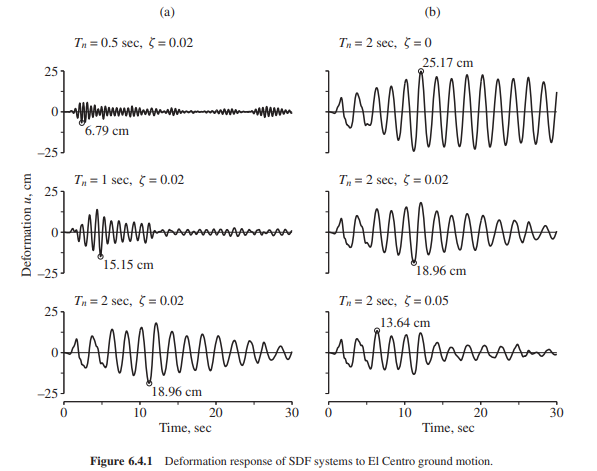

In [1]:
import openseespy.opensees as ops
import numpy as np
import opsvis as ovs
import matplotlib.pyplot as plt

In [12]:
ops.wipe()
ops.model('BasicBuilder', '-ndm', 1, '-ndf', 1)


#### FIST COLUMN SYSTEM: VARYING TIME PERIOD #####
# 1st sdof
ops.node(1, 0)
ops.node(2, 0)
ops.fix(1, 1)

xi = 0.02
T = 0.5
w = 2*np.pi / T

m = 45594
k = w**2 * m
c = 2*m*w*xi

ops.mass(2, m)

ops.uniaxialMaterial('Elastic', 101, k) #left stiffness param
ops.uniaxialMaterial('Viscous', 201, c, 1) #left damping param
ops.uniaxialMaterial('Parallel', 301, *[101, 201]) #left combined
ops.element('zeroLength', 101, *[1,2], '-mat', 301, '-dir', 1) #element



# 2nd sdof
ops.node(12, 2)
ops.node(22, 2)
ops.fix(12, 1)

xi = 0.02
T = 1
w = 2*np.pi / T

m = 45594
k = w**2 * m
c = 2*m*w*xi

ops.mass(22, m)

ops.uniaxialMaterial('Elastic', 102, k) #left stiffness param
ops.uniaxialMaterial('Viscous', 202, c, 1) #left damping param
ops.uniaxialMaterial('Parallel', 302, *[102, 202]) #left combined
ops.element('zeroLength', 102, *[12,22], '-mat', 302, '-dir', 1) #element



# 3rd sdof
ops.node(13, 3)
ops.node(23, 3)
ops.fix(13, 1)

xi = 0.02
T = 2
w = 2*np.pi / T

m = 45594
k = w**2 * m
c = 2*m*w*xi

ops.mass(23, m)

ops.uniaxialMaterial('Elastic', 103, k) #left stiffness param
ops.uniaxialMaterial('Viscous', 203, c, 1) #left damping param
ops.uniaxialMaterial('Parallel', 303, *[103, 203]) #left combined
ops.element('zeroLength', 103, *[13,23], '-mat', 303, '-dir', 1) #element


In [13]:
#### SECOND COLUMN SYSTEM: VARYING TIME PERIOD #####
# 1st sdof
ops.node(3, 4)
ops.node(4, 4)
ops.fix(3, 1)

xi = 0
T = 2
w = 2*np.pi / T

m = 45594
k = w**2 * m
c = 2*m*w*xi

ops.mass(4, m)

ops.uniaxialMaterial('Elastic', 401, k) #left stiffness param
ops.element('zeroLength', 401, *[3,4], '-mat', 401, '-dir', 1) #element



# 2nd sdof
ops.node(32, 5)
ops.node(42, 5)
ops.fix(32, 1)

xi = 0.02
T = 2
w = 2*np.pi / T

m = 45594
k = w**2 * m
c = 2*m*w*xi

ops.mass(42, m)

ops.uniaxialMaterial('Elastic', 402, k) #left stiffness param
ops.uniaxialMaterial('Viscous', 502, c, 1) #left damping param
ops.uniaxialMaterial('Parallel', 602, *[402, 502]) #left combined
ops.element('zeroLength', 402, *[32,42], '-mat', 602, '-dir', 1) #element




# 3rd sdof
ops.node(33, 6)
ops.node(43, 6)
ops.fix(33, 1)

xi = 0.05
T = 2
w = 2*np.pi / T

m = 45594
k = w**2 * m
c = 2*m*w*xi

ops.mass(43, m)

ops.uniaxialMaterial('Elastic', 403, k) #left stiffness param
ops.uniaxialMaterial('Viscous', 503, c, 1) #left damping param
ops.uniaxialMaterial('Parallel', 603, *[403, 503]) #left combined
ops.element('zeroLength', 403, *[33,43], '-mat', 603, '-dir', 1) #element


In [14]:
# ground motion
val = np.loadtxt("ElCentro.txt")
dt = 0.02
dtAnalysis = 0.005
TmaxAnalysis = 30
nStep = int(TmaxAnalysis/dtAnalysis)

In [15]:
gmTS = 1
GM_dirn = 1
GM_fact = 9.81
ops.timeSeries("Path", gmTS, '-dt', dt, '-values', *val)
ops.pattern('UniformExcitation', 300, GM_dirn, '-accel', gmTS, '-fact', GM_fact)

In [16]:
ops.constraints("Transformation")
ops.numberer("Plain")
ops.system("ProfileSPD")
tol = 1.e-8
maxNumIter = 50
ops.test("EnergyIncr", tol, maxNumIter)
ops.algorithm("ModifiedNewton")
ops.integrator("Newmark", .5, .25)
ops.analysis("Transient")

In [17]:
nodes = np.array([[2,4], [22,42], [23,43]])
data_dict = {}
time = []
for i in range(len(nodes.flatten())):
    data_dict[f"{nodes.flatten()[i]}"] = []

for i in range(nStep):
    ops.analyze(1, dtAnalysis)
    time.append(ops.getTime())
    for nodeTag, Disp in data_dict.items():
        Disp.append(ops.nodeDisp(int(nodeTag), 1)*100) #in cm

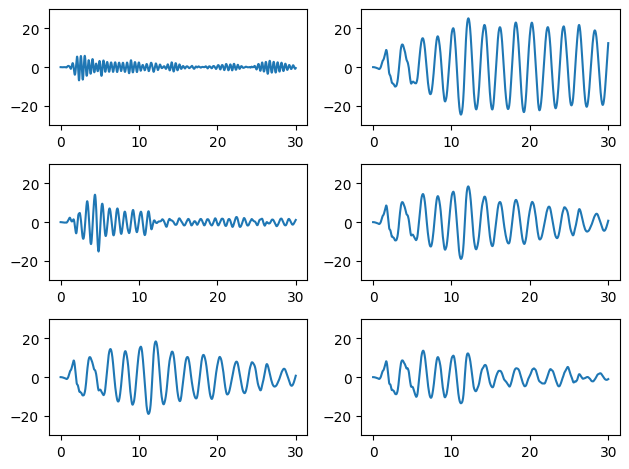

In [19]:
fig, ax = plt.subplots(3,2, tight_layout = True)
for i in range(3):
    for j in range(2):
        #ax[i][j].axhline(0, c='k')
        ax[i][j].plot(time, data_dict[f"{nodes[i][j]}"])
        ax[i][j].set_ylim([-30,30])
        
        #ax[i][j].set_yticks(range(-25,26,20))
        #ax[i][j].set_yticklabels(range(-25,26,5))

plt.show()

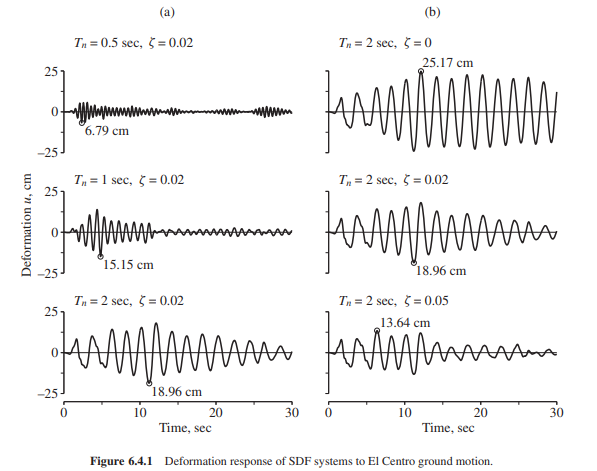